In [1]:
# Imports
import time
import math
import sys
import numpy as np
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy
from PIL import Image
from scipy import ndimage
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict
from fc_utils import *
from cnn_utils import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(3)

/Users/samshen/anaconda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
# train_data_orig, train_labels_orig, eval_data_orig, eval_labels_orig, classes = load_dataset()
# classes = 6
# train_labels = np.squeeze(train_labels_orig)
# train_labels_old = train_labels
# train_labels = one_hot_label(classes, train_labels_old)
# eval_labels = np.squeeze(eval_labels_orig)
# eval_labels_old = eval_labels
# eval_labels = one_hot_label(classes, eval_labels_old)
# # Flatten the training and test images
# train_data = train_data_orig.reshape(train_data_orig.shape[0], -1).T
# eval_data = eval_data_orig.reshape(eval_data_orig.shape[0], -1).T
# # Normalize image vectors
# train_data = train_data/255.
# eval_data = eval_data/255.
# features = train_data.shape[0]
# print(train_data.shape)

In [2]:
# Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images # Returns np.array
classes = 10
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
train_labels = one_hot_label(classes, train_labels)
eval_data = mnist.test.images # Returns np.array
eval_labels_old = np.asarray(mnist.test.labels, dtype=np.int32)
eval_labels = one_hot_label(classes, eval_labels_old)
features = train_data.shape[0]

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(55000, 784)
(10000, 784)


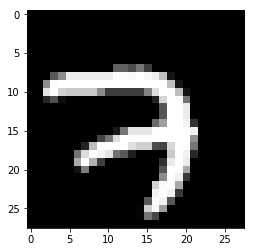

In [3]:
print(train_data.shape)
print(eval_data.shape)
# Input Layer
input_layer = train_data.reshape(55000,1,28,28)
eval_data = eval_data.reshape(10000,1,28,28)
plt.imshow(input_layer[0,0])

## Plan
**input layer:** mx28x28x1

**conv layer1 + Relu:** mx28x28x32

**pool layer1:** mx14x14x32

**conv layer2 + Relu:** mx14x14x64

**pool layer2:** mx7x7x64

**flatten:** mx3136

**fc layer1:** mx1024

**output layer:** mx10

**softmax:** mx10

Cost after iteration 0, batch 0: 2.301250
Cost after iteration 0: 2.301250


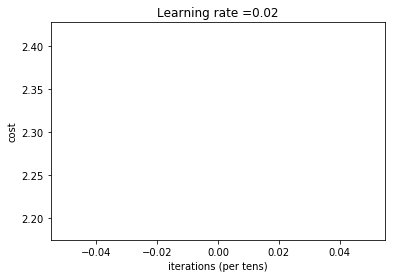

In [14]:
# training model
filter_dims = [(32,1,5,5),(64,32,5,5)]
layers_dims = [3136, 1024, classes] #  2-layer model
parameters, parameters_conv, grads, conv_grads = cnn_model(input_layer[0:256], train_labels[0:256], filter_dims, layers_dims, 
                                                           truncate = 0, batch_size = 256, learning_rate = 0.02, num_iterations = 1, print_cost = True)


Cost after iteration 0, batch 0: 2.303313
Cost after iteration 0, batch 1: 2.301853
Cost after iteration 0, batch 2: 2.298201
Cost after iteration 0, batch 3: 2.299504
Cost after iteration 0: 2.299504
Cost after iteration 1, batch 0: 2.302269
Cost after iteration 1, batch 1: 2.299666
Cost after iteration 1, batch 2: 2.296055
Cost after iteration 1, batch 3: 2.297936
Cost after iteration 1: 2.297936
Cost after iteration 2, batch 0: 2.300741
Cost after iteration 2, batch 1: 2.296263
Cost after iteration 2, batch 2: 2.292883
Cost after iteration 2, batch 3: 2.295207
Cost after iteration 2: 2.295207
Cost after iteration 3, batch 0: 2.298527
Cost after iteration 3, batch 1: 2.290959
Cost after iteration 3, batch 2: 2.288394
Cost after iteration 3, batch 3: 2.291005
Cost after iteration 3: 2.291005
Cost after iteration 4, batch 0: 2.295439
Cost after iteration 4, batch 1: 2.283255
Cost after iteration 4, batch 2: 2.281799
Cost after iteration 4, batch 3: 2.284724
Cost after iteration 4: 2.28

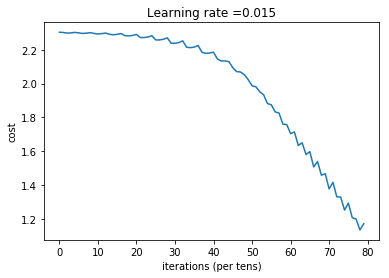

In [15]:
#further training on the same model 
parameters, parameters_conv, grads, conv_grads = cnn_model(input_layer[0:256], train_labels[:,0:256], layers_dims, filter_dims, truncate = 0, batch_size = 64, learning_rate = 0.015, num_iterations = 20, parameters = parameters, parameters_conv = parameters_conv, print_cost = True)


In [ ]:
train_labels.shape

In [ ]:
#eval_cnn_model(input_layer[0:256], train_labels[:,0:256], parameters, parameters_conv)

eval_cnn_model(eval_data[0:512], eval_labels[:,0:512], parameters, parameters_conv)

In [ ]:
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
image_num = 88
predict_cnn(eval_data[image_num:image_num+1],parameters, parameters_conv)
print("actual value: " + str(eval_labels_old[image_num]))
data = mnist.test.images[image_num].reshape(28,28)
plt.imshow(data)

In [ ]:
out = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['b1'].reshape(-1), 
                     parameters_conv['W3'].reshape(-1), parameters_conv['b3'].reshape(-1)))
mu = np.mean(out)
variance = np.var(out)
sigma = math.sqrt(variance)
x = np.linspace(mu - 4 * sigma , mu + 4 * sigma , 1000)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print("one std is",sigma)

In [ ]:
out_m = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['b1'].reshape(-1), 
                     parameters_conv['W3'].reshape(-1), parameters_conv['b3'].reshape(-1)))
mu_m = np.mean(out_m)
variance_m = np.var(out_m)
sigma_m = math.sqrt(variance_m)
y = np.linspace(mu_m - 4 * sigma_m , mu_m + 4 * sigma_m , 1000)
plt.plot(y,mlab.normpdf(y, mu_m, sigma_m),'-', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_m)

/Users/samshen/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


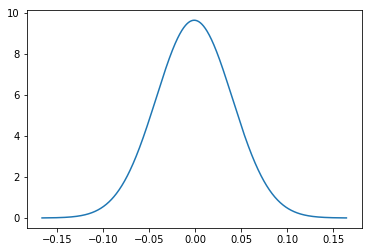

one std is 0.04137766018428674


In [5]:
out = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu = np.mean(out)
variance = np.var(out)
sigma = math.sqrt(variance)
x = np.linspace(mu - 4 * sigma , mu + 4 * sigma , 1000)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print("one std is",sigma)

/Users/samshen/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


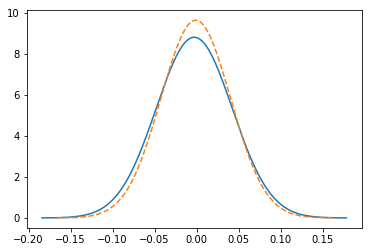

one std is 0.04527126647364083


In [13]:
out_m = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu_m = np.mean(out_m)
variance_m = np.var(out_m)
sigma_m = math.sqrt(variance_m)
x_m = np.linspace(mu_m - 4 * sigma_m , mu_m + 4 * sigma_m , 1000)
plt.plot(x_m,mlab.normpdf(x_m, mu_m, sigma_m),'-', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_m)

In [ ]:
out_f = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu_f = np.mean(out_f)
variance_f = np.var(out_f)
sigma_f = math.sqrt(variance_f)
x_f = np.linspace(mu_f - 4 * sigma_f , mu_f + 4 * sigma_f , 1000)
plt.plot(x_f,mlab.normpdf(x_f, mu_f, sigma_f),'-',x_m,mlab.normpdf(x_m, mu_m, sigma_m),'-.', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_m)

In [ ]:
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^', t, t**4, 'r-')
plt.show()

In [ ]:
out = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['W3'].reshape(-1),
                      parameters_conv['b1'].reshape(-1),parameters_conv['b3'].reshape(-1),
                      conv_grads['dW1'].reshape(-1), conv_grads['dW3'].reshape(-1),
                      conv_grads['db1'].reshape(-1),conv_grads['db3'].reshape(-1)))
out = out.reshape(-1,8)
np.savetxt("parameters.csv", out, delimiter=",")